In [47]:
%reset
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import esn_module
import importlib
importlib.reload(esn_module)
esn = esn_module.esn

from echo_state_tests import gen_in_out_one_in_subs

from tqdm import tqdm_notebook as tqdm

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [83]:
ESN=esn(N=1000)

In [92]:
in_xor,out_xor = gen_in_out_one_in_subs(20000,5)
in_xor *= 2.

in_gauss = np.random.normal(0.,0.1,(20000))*10.

In [93]:
y,bias,gain = ESN.run_hom_adapt_fisher(in_gauss,return_reservoir_rec=True,return_gain_rec=True,return_bias_rec=True,subsample_rec=10)

100%|██████████| 19999/19999 [00:08<00:00, 2465.13it/s]


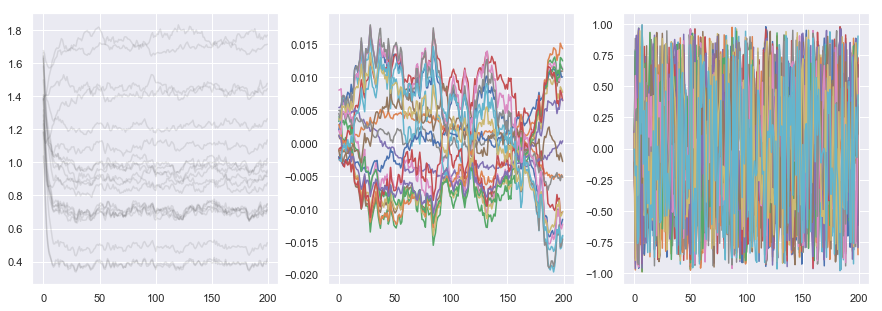

In [94]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(gain[::10,:20],c='k',alpha=0.1)
ax[1].plot(bias[::10,:20])
ax[2].plot(y[::10,:20])
plt.show()

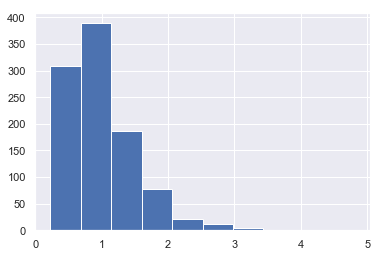

In [95]:
plt.hist(ESN.gain)
plt.show()

In [96]:
l=np.linalg.eigvals(ESN.W_gain())

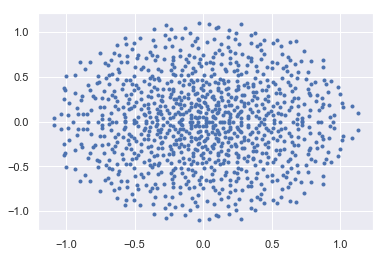

In [97]:
plt.plot(l.real,l.imag,'.')
plt.show()